In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import joblib
from CHAID import Tree

In [104]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv("churn.csv")  
print("Shape:", df.shape)
df.head()

Shape: (5000, 18)


,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [106]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [107]:
print("Missing Values:", df.isnull().sum())

Missing Values: churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64


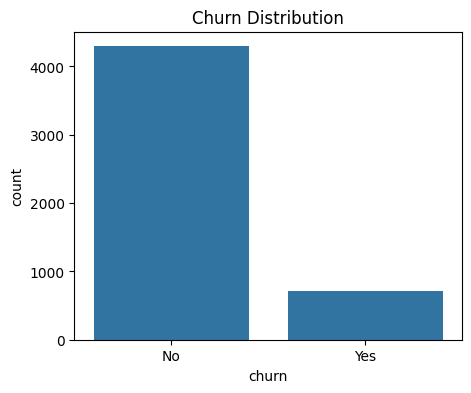

In [108]:
#EDA
target_col = 'churn'
# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("Churn Distribution")
plt.show()

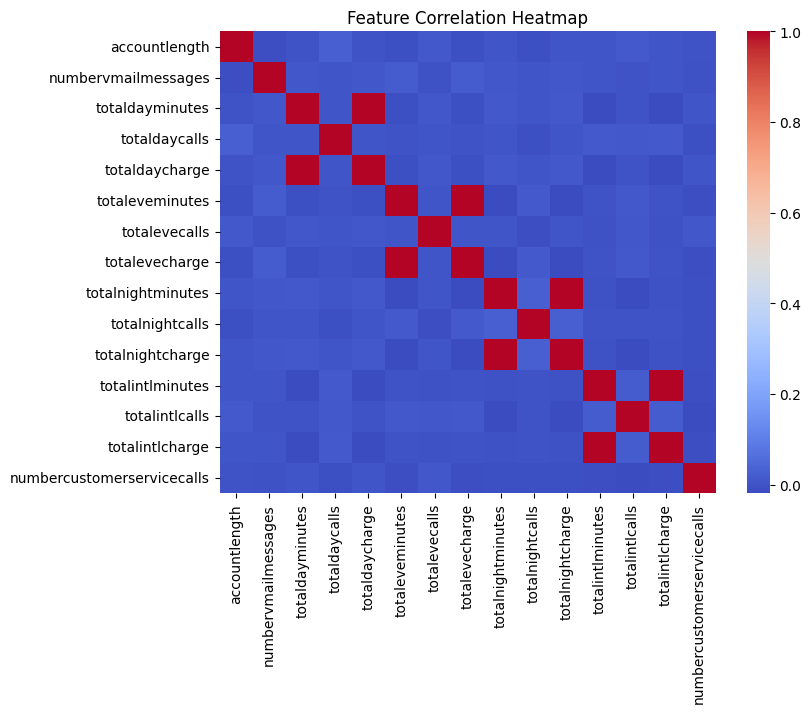

In [109]:
#numeric fearures corr
#key fcators influencing churn
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

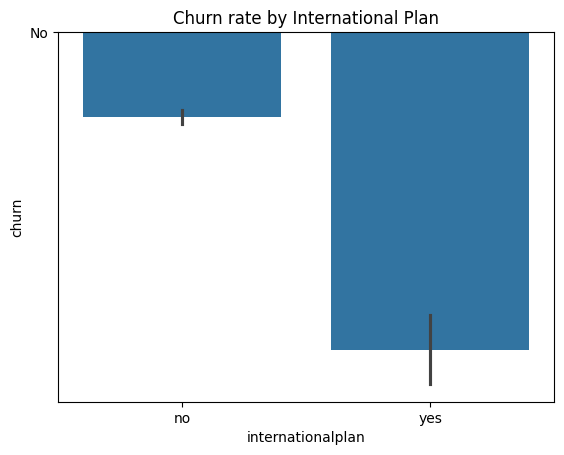

In [110]:
#for categorical
sns.barplot(x='internationalplan', y='churn', data=df)
plt.title("Churn rate by International Plan")
plt.show()

In [111]:
# DATA CLEANING AND PREPROCESSING
df = df.drop_duplicates()
df = df.fillna(df.mode().iloc[0])

In [112]:
#encoding
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [113]:
#train test split
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (4000, 17)
Test shape: (1000, 17)


In [114]:
scaler = StandardScaler()    #scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
model = LogisticRegression(max_iter=1000)    
model.fit(X_train_scaled, y_train)            #model training

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [116]:
#predictions
y_pred = model.predict(X_test_scaled)           
y_prob = model.predict_proba(X_test_scaled)[:, 1]
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [117]:
print("Model Evaluation :")
print("\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(" Matrix:", confusion_matrix(y_test, y_pred))
print(" Report:", classification_report(y_test, y_pred))

Model Evaluation :


Accuracy: 0.869
 Matrix: [[841  18]
 [113  28]]
 Report:               precision    recall  f1-score   support

           0       0.88      0.98      0.93       859
           1       0.61      0.20      0.30       141

    accuracy                           0.87      1000
   macro avg       0.75      0.59      0.61      1000
weighted avg       0.84      0.87      0.84      1000



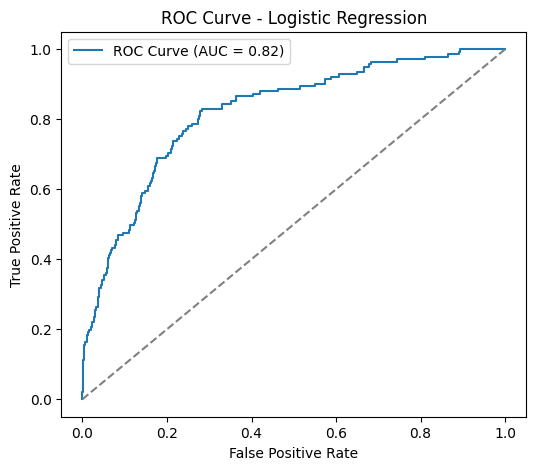

In [118]:
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [ ]:
def lift_table(y_true, y_score, n_bins=10):
    df_lift = pd.DataFrame({'y': y_true, 'score': y_score})
    df_lift['bucket'] = pd.qcut(df_lift['score'], q=n_bins, duplicates='drop')
    lift = df_lift.groupby('bucket', as_index=False).agg({'y':['count','sum']})
    lift.columns = ['bucket','total','churned']
    lift['rate'] = lift['churned']/lift['total']
    overall_rate = df_lift['y'].mean()
    lift['lift'] = lift['rate']/overall_rate
    return lift.sort_values(by='bucket', ascending=False)

lift_df = lift_table(y_test, y_prob)
print(" Lift Table : ")
print(lift_df)

 --- Lift Table ---
                            bucket  total  churned  rate      lift
9                    (0.34, 0.962]    100       51  0.51  3.617021
8                    (0.208, 0.34]    100       30  0.30  2.127660
7                   (0.143, 0.208]    100       24  0.24  1.702128
6                   (0.107, 0.143]    100       12  0.12  0.851064
5                  (0.0801, 0.107]    100        7  0.07  0.496454
4                 (0.0626, 0.0801]    100        3  0.03  0.212766
3                 (0.0455, 0.0626]    100        5  0.05  0.354610
2                 (0.0297, 0.0455]    100        5  0.05  0.354610
1                 (0.0172, 0.0297]    100        2  0.02  0.141844
0  (3.000000000000008e-05, 0.0172]    100        2  0.02  0.141844


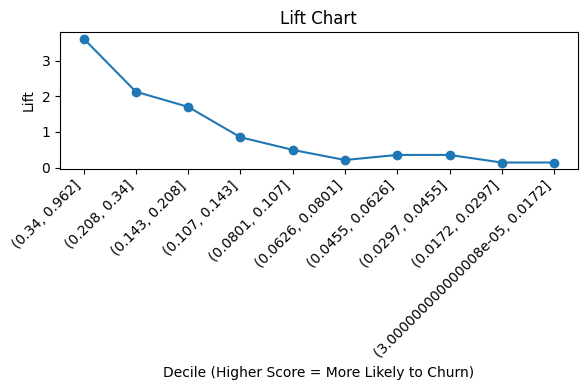

In [120]:
#LIFT CHART plotting
x_labels = lift_df['bucket'].astype(str)

plt.figure(figsize=(6,4))
plt.plot(x_labels, lift_df['lift'], marker='o')
plt.title("Lift Chart")
plt.xlabel("Decile (Higher Score = More Likely to Churn)")
plt.ylabel("Lift")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [121]:
joblib.dump(model, "churn_model.joblib")
joblib.dump(scaler, "scaler.joblib")
print("✅ Model and scaler saved for deployment!")

✅ Model and scaler saved for deployment!


CHAID-Style Decision Tree Rules :
|--- totaldaycharge <= 2.50
|   |--- numbercustomerservicecalls <= 2.50
|   |   |--- internationalplan <= 2.50
|   |   |   |--- totalevecharge <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- totalevecharge >  0.50
|   |   |   |   |--- class: 0
|   |   |--- internationalplan >  2.50
|   |   |   |--- totalintlcalls <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- totalintlcalls >  0.50
|   |   |   |   |--- class: 0
|   |--- numbercustomerservicecalls >  2.50
|   |   |--- totaldayminutes <= 1.50
|   |   |   |--- totalevecharge <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- totalevecharge >  2.50
|   |   |   |   |--- class: 0
|   |   |--- totaldayminutes >  1.50
|   |   |   |--- totalnightcharge <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- totalnightcharge >  1.50
|   |   |   |   |--- class: 0
|--- totaldaycharge >  2.50
|   |--- voicemailplan <= 2.50
|   |   |--- totalevecharge <= 1.50
|   |   |   |--- totalnightcharge <= 1.

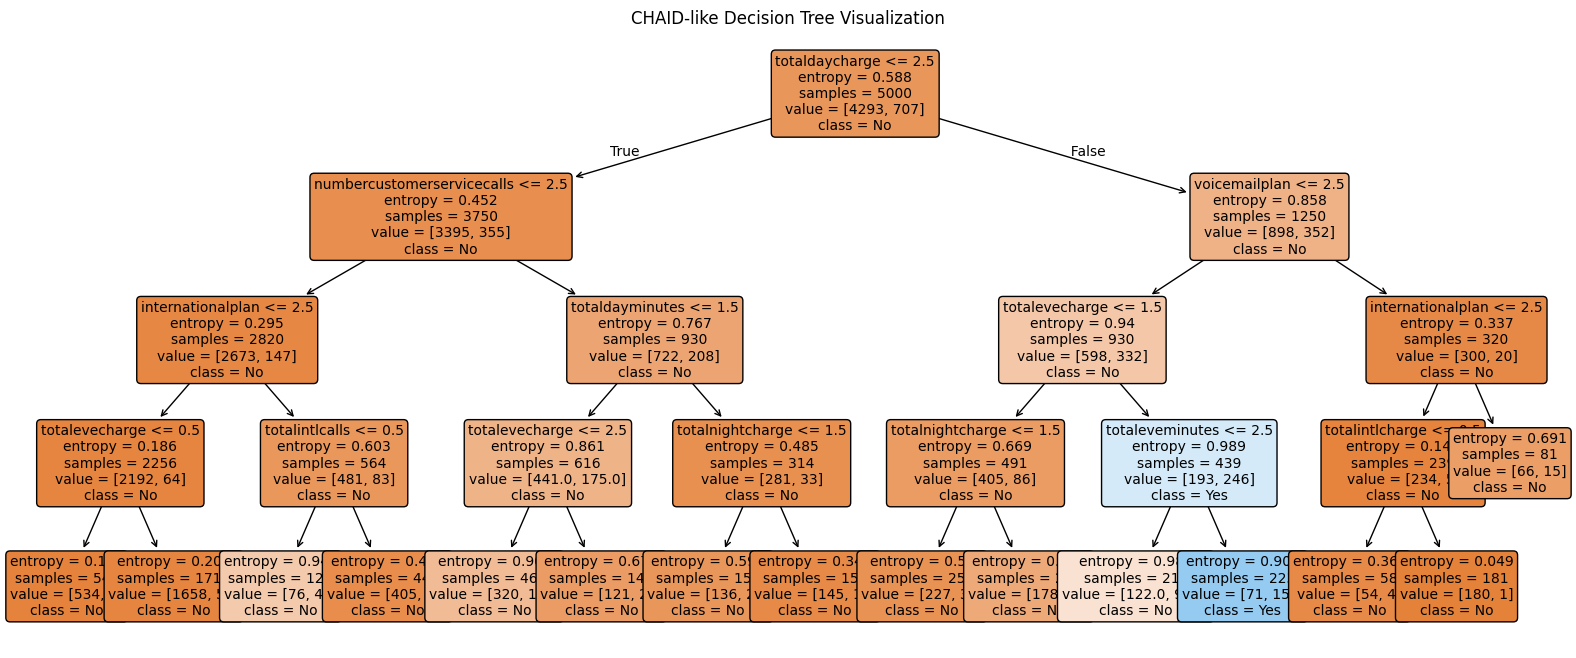

In [122]:

# CHAID-Like Decision Rules and Visualization

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# ConvertING continuous vars to categorical bins
df_for_tree = df.copy()
for c in df_for_tree.columns:
    if df_for_tree[c].dtype != 'O' and c != target_col:
        df_for_tree[c] = pd.qcut(df_for_tree[c].rank(method="first"), 4, duplicates='drop', labels=False)

X_tree = df_for_tree.drop(columns=[target_col])
y_tree = df_for_tree[target_col]


dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,              
    min_samples_leaf=50,
    random_state=42
)
dt.fit(X_tree, y_tree)

# Print readable rules
print("CHAID-Style Decision Tree Rules :")
rules = export_text(dt, feature_names=list(X_tree.columns))
print(rules)

# Visualize the tree
plt.figure(figsize=(20,8))
plot_tree(
    dt,
    feature_names=X_tree.columns,
    class_names=['No','Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("CHAID-like Decision Tree Visualization")
plt.show()


In [123]:
#for new prediction
def predict_new_customer(data_dict):
    model = joblib.load("churn_model.joblib")
    scaler = joblib.load("scaler.joblib")
    df_new = pd.DataFrame([data_dict])
    df_new = df_new.reindex(columns=X.columns, fill_value=0)
    df_new_scaled = scaler.transform(df_new)
    prob = model.predict_proba(df_new_scaled)[:,1][0]
    pred = model.predict(df_new_scaled)
    if pred[[0]]==0:
        pred='NO'
    else:
        pred='YES'    
        
    return  pred,prob

In [124]:
#sample prediction
new_customer = {
    'accountlength': 120,
    'internationalplan': 0,
    'voicemailplan': 1,
    'numbervmailmessages': 10,
    'totaldayminutes': 200,
    'totaldaycalls': 100,
    'totaleveminutes': 150,
    'totalevecalls': 100,
    'totalnightminutes': 180,
    'totalnightcalls': 100,
    'totalintlminutes': 10,
    'totalintlcalls': 3,
    'numbercustomerservicecalls': 2
}
predict_new_customer(new_customer)

('NO', np.float64(0.0013905790851997948))